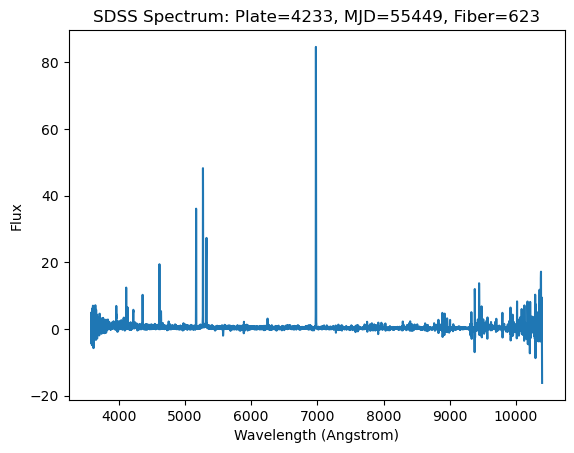

In [1]:
from astroquery.sdss import SDSS
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from specutils import Spectrum1D
from labellines import labelLines
import matplotlib.axes as axes

plate = 4233
mjd = 55449
fiber = 623

sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)

spec_hdu = sp[0]
spec_data = spec_hdu[1].data

z = spec_hdu[2].data["z"]
print(spec_hdu[2])

header = spec_hdu[0].header

loglam = spec_data['loglam']
flux = spec_data['flux']
wavelength = 10**loglam

plt.plot(wavelength, flux)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.title(f"SDSS Spectrum: Plate={plate}, MJD={mjd}, Fiber={fiber}")
plt.show()

C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:181: UserWarning: Tried to label line Line2D(_child6), but could not find a label for it.
  warnings.warn(
C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:267: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=4960.294999999999, xmax=4960.294999999999, xval=4960.295). Clipping it into the allowed range.
  warnings.warn(
C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:267: UserWarning: The value at position 3 in `xvals` is outside the range of its associated line (xmin=4862.679999999999, xmax=4862.679999999999, xval=4862.68). Clipping it into the allowed range.
  warnings.warn(
C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:267: UserWarning: The value at position 4 in `xvals` is outside the range of its associated line (xmin=4102.889999999999, xmax=4102.889999999999, xval=4102.89). Clipping it into the allowed range.
  warnings.warn(


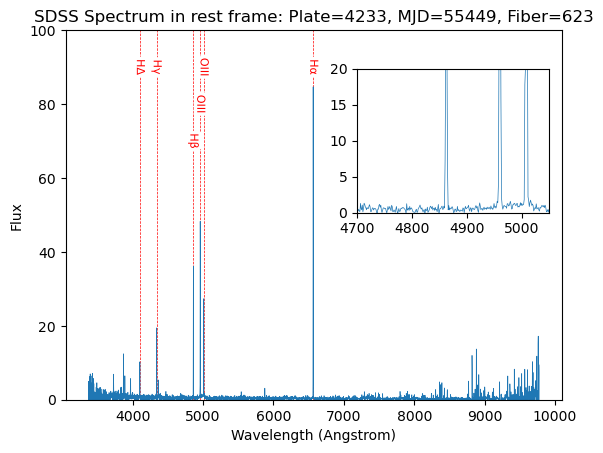

In [3]:
fig, ax = plt.subplots()

#common spectral lines in SDSS
xvals = [6564.61, 5008.240, 4960.295, 4862.68, 4102.89, 4341.68 ]
label = ['Hα', 'OIII', 'OIII', 'Hβ', 'HΔ', 'Hγ']

for i in range(len(xvals)):
     plt.axvline(xvals[i], color="red", linewidth=0.5, linestyle="--", label= label[i])

#plot the spectrum
ax.plot(wavelength/(1+z), flux, linewidth=0.5)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.ylim(0,100)
plt.title(f"SDSS Spectrum in rest frame: Plate={plate}, MJD={mjd}, Fiber={fiber}")

#vertical lines
offset = [40, 40, 30, 20, 40, 40]
lines = plt.gca().get_lines()
labelLines(lines, align=True, yoffsets=offset, xvals = xvals, fontsize = 8)

#inset plot
inset = fig.add_axes([0.58, 0.5, 0.3, 0.3])
inset.plot(wavelength/(1+z), flux, linewidth=0.5)
inset.set_xlim(4700, 5050)
inset.set_ylim(0, 20)
plt.savefig("SDSS_model.png")

plt.show()